<font size = 6> Machine Learning with Autodiff

***

## Libraries & Stuff

In [ ]:
import numpy as np

In [1]:
import torch

In [ ]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

.DS_Store files

find .  -name ".DS_Store" -depth -exec rm {} \;

In [1]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

In [2]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

***

In [3]:
x = torch.tensor([0,1,2,3,4,5,6,7.])

# E.g.: Dosage of drug for treating Alzheimer's disease

In [4]:
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

The $y$ values were created using the equation of a line $y = mx + b$. This way, we know what the model parameters to be learned are, say, $m = -0.5$ and $b = 2$. Random, normally-distributed noise has been added to simulate sampling error: 

***

For reproducibility of this demo, here's a fixed example of $y$ values obtained by running the commented-out line above: 

In [4]:
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37]) 

# E.g.: Patient's "forgetfulness score"

In [6]:
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

In [ ]:
# standard values for demo only

***

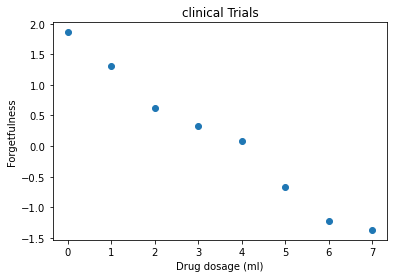

In [7]:
fig, ax = plt.subplots()
plt.title("clinical Trials")
plt.xlabel("Drug dosage (ml)")
plt.ylabel("Forgetfulness")
_=ax.scatter(x,y)

***

Initialize the slope parameter $m$ with a "random" value of 0.9...

(**N.B.**: In this simple demo, we could guess approximately-correct parameter values to start with. Or, we could use an algebraic (e.g., Moore-Penrose pseudoinverse) or statistical (e.g., ordinary-least-squares regression) to solve for the parameters quickly. This tiny machine learning demo with two parameters and eight data points scales, however, to millions of parameters and millions of data points. The other approaches -- guessing, algebra, statistics -- do not come close to scaling in this way.)

***

In [28]:
# set the required grad value to true

In [5]:
m = torch.tensor([0.9]).requires_grad_()

In [9]:
m

tensor([0.9000], requires_grad=True)

In [6]:
b = torch.tensor([0.1]).requires_grad_()

In [11]:
b

tensor([0.1000], requires_grad=True)

In [35]:
# w ejust deliberately picked a y interfce of 0.1 (whereas it willbe closer to 2)

# just to see the model learning

***

In [7]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [8]:
def regression_plot(my_x, my_y, my_m, my_b):
    
    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

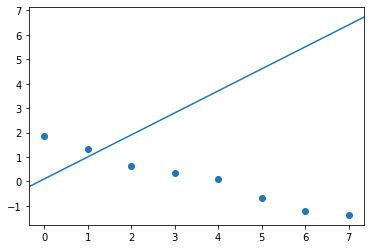

In [9]:
regression_plot(x, y, m, b)

In [17]:
# we are trying to git a line to the data based on values of m & b (as above)

***

# Section Starts Here

***

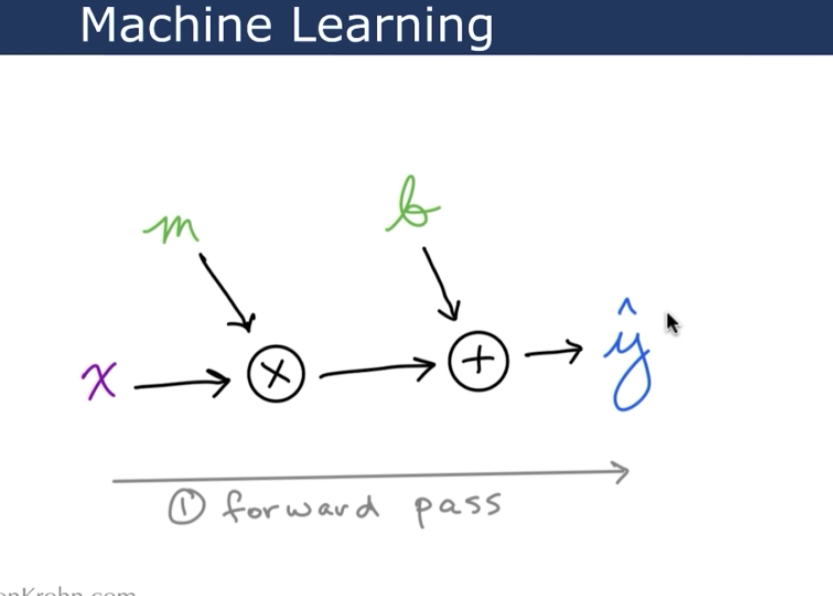

In [1]:
# step 1 is the forward pass

In [2]:
# y hat (this is an estimate of what y is)

In [3]:
# after randomly initializing m and b

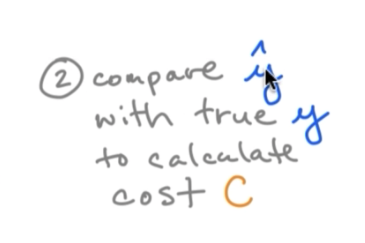

In [4]:
# true y is from the data

In [5]:
# we calculate cost C

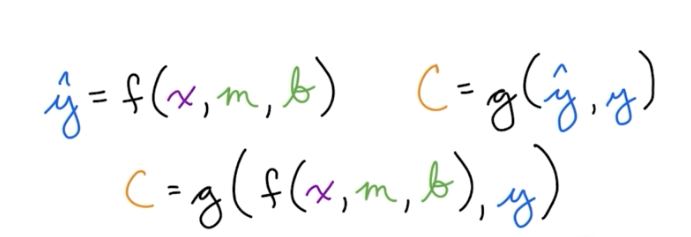

In [6]:
# then comes the chain rule

In [7]:
# cost function g takes in the estimated y and true y and returns the cost C

In [8]:
# y hat is calculated from the forward pass

In [9]:
# y hat = f(x,m,b)

***

putting both together, we get the nested function

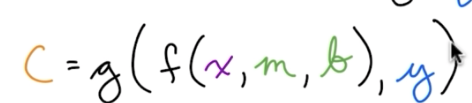

***

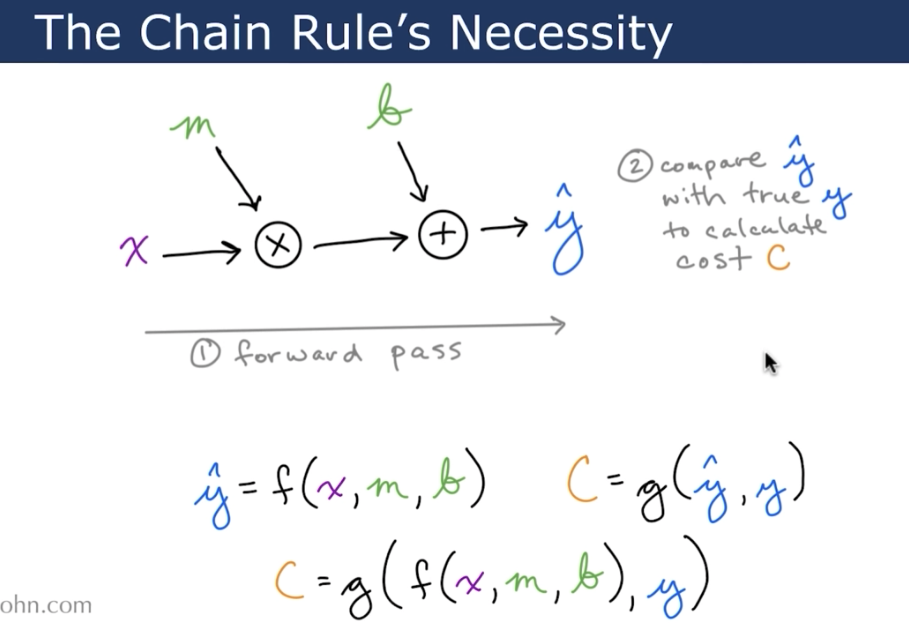

***

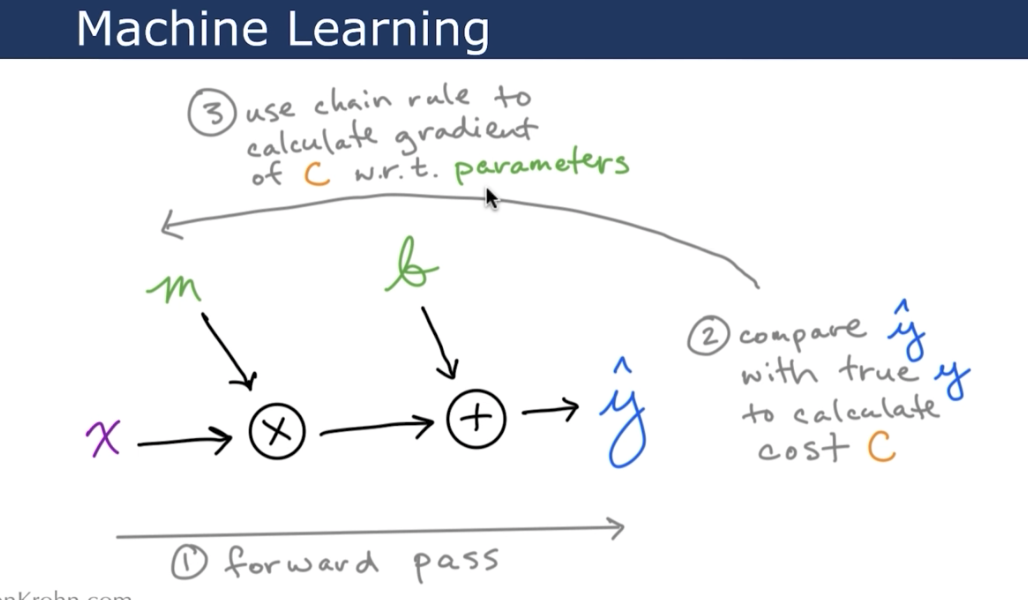

In [11]:
# uses chain rule to calculate the gradient of C wrt parameters

In [12]:
# will learn more in Calculus II

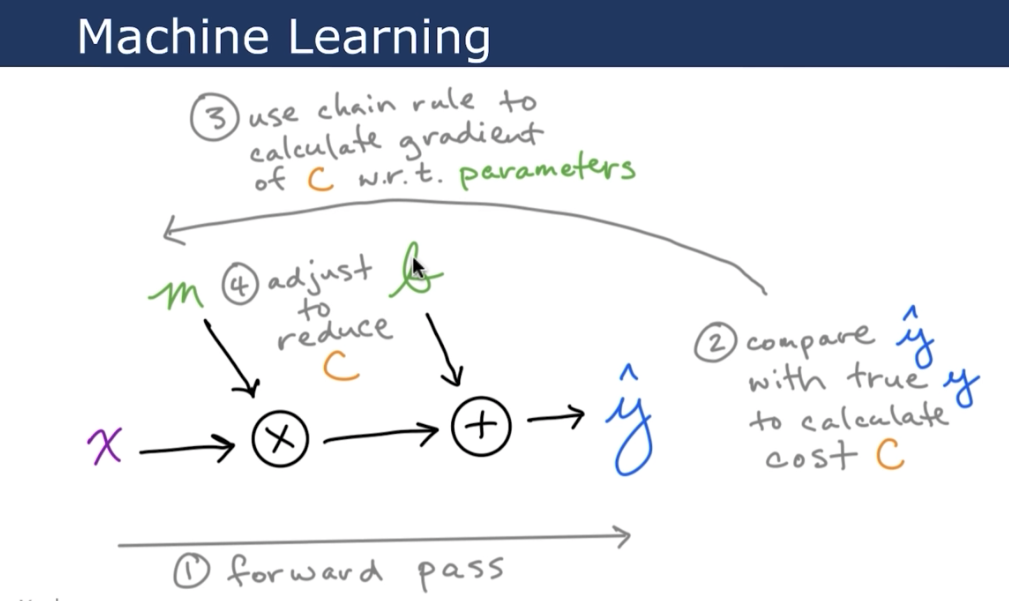

In [13]:
# in the final step which is to adjust the parameters m & b to get a lower value of C

In [14]:
# this is the fundamental idea behind machine learning

In [15]:
# this is the process of training

***

# Machine Learning

## Step 1: Forward Pass

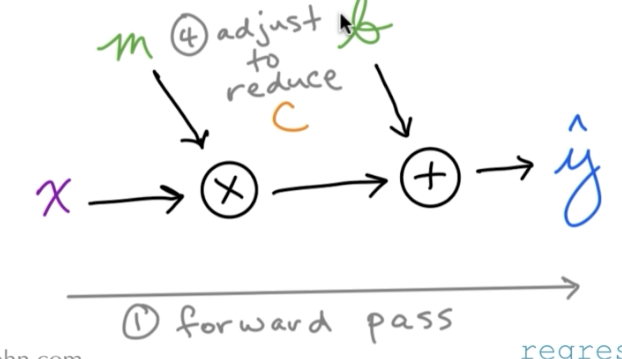

In [18]:
# step 1

In [13]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [14]:
def regression_plot(my_x, my_y, my_m, my_b):
    
    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

***

In [15]:
m

tensor([0.9000], requires_grad=True)

In [16]:
b

tensor([0.1000], requires_grad=True)

In [36]:
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [21]:
# STEP 1

In [17]:
# first estimate

yhat = regression(x, m, b)

# the regression function is simply y = mx + b

# original values of m and b are: m (0.9) and b *0.1

In [18]:
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

In [37]:
# these are estimates of y for all x values

***

## Step 2: Compare yhat with true y to calculate cost C

There is a PyTorch `MSELoss` method, but let's define it outselves to see how it works. MSE cost is defined by: $$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

In [38]:
# MSError -- mean squared error

# we not just take the difference, but also take the mean. 

# square -- exponentially larger cost for higher differences between y and yhat

In [39]:
# in our case we have 8 data points

In [40]:
# let us define our own function for MSE

# we can use the PyTorch function later

In [19]:
# this is the custom MSE function

def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [20]:
C = mse(yhat, y)

In [21]:
C

tensor(19.6755, grad_fn=<DivBackward0>)

***

## Step 3: Use Autodiff to calculate gradient of C wrt parameters

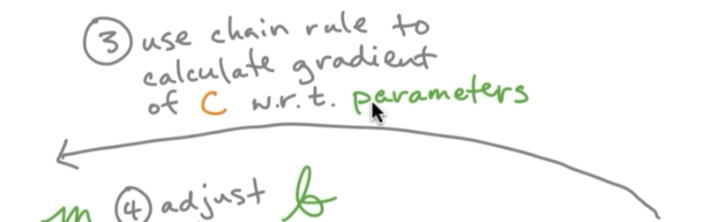

In [22]:
C.backward()

# we are going to differentiate the cost from the earlier tensors

# this is the automatic differentiation

In [23]:
m

tensor([0.9000], requires_grad=True)

In [24]:
m.grad

# the derivative (slope) of C with rest to m is a postiive 36

tensor([36.3050])

In [25]:
b

tensor([0.1000], requires_grad=True)

In [26]:
b.grad

# the derivative (ie slope) of C wrt b is also positive 6

tensor([6.2650])

***

## Step 4: Gradient Descent

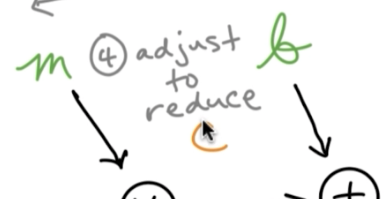

In [55]:
# we will derive the SGD in course 8

In [56]:
# for now we will use the build in module

In [29]:
optimizer = torch.optim.SGD([m,b], lr = 0.01)

# initialize the optimzer

***

In [30]:
# execute steps

In [33]:
optimizer.step()

In [38]:
m

# this was 0.9
# slope was higher before (there was a positive relationship between C and m)

tensor([0.5369], requires_grad=True)

In [37]:
b

# this was 0.1

tensor([0.0374], requires_grad=True)

In [36]:
# notice that the vallues of m and b are now different

***

# Did this work?

### replot

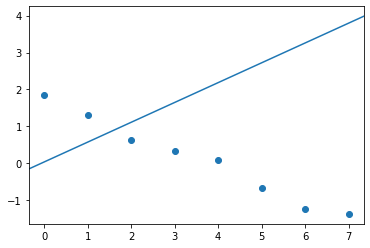

In [39]:
regression_plot(x, y, m, b)

In [ ]:
# not particularly good 

# but better than prior (notice y axis is 7 -- now is 4)

PRIOR VALUE

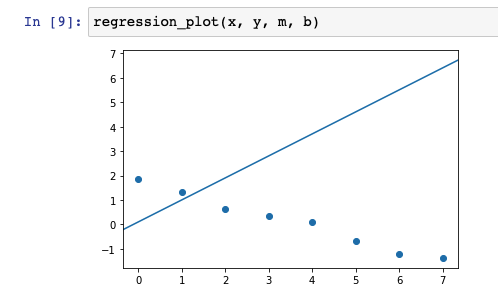

In [40]:
# this was after just one round

***

## Repeat Steps 1 and 2

In [41]:
C = mse(regression(x, m, b), y)

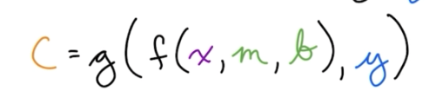

In [42]:
C

tensor(8.5722, grad_fn=<DivBackward0>)

In [44]:
# the cost is 8.6

# the initial cost was 20

***

In [47]:
# now let us put this into a loop

In [57]:
epochs = 1000

for epoch in range(epochs):
    
    optimizer.zero_grad()
    # this resets gradients to zero. Else they accumulate
    
    yhat = regression(x,m,b) ## STEP 1 (Forward Pass)
    
    C = mse(yhat, y) ## STEP 12 (Compare values)
    
    C.backward() ## STEP 3 (calculate cost)
    
    optimizer.step() # STEP 4 (Gradient Descent)
    
    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, cost 0.0195, m grad 1.94e-06, b grad -1.11e-05
Epoch 1, cost 0.0195, m grad 1.88e-06, b grad -1.11e-05
Epoch 2, cost 0.0195, m grad 1.73e-06, b grad -1.1e-05
Epoch 3, cost 0.0195, m grad 1.22e-06, b grad -1.11e-05
Epoch 4, cost 0.0195, m grad 2.06e-06, b grad -1.08e-05
Epoch 5, cost 0.0195, m grad 1.61e-06, b grad -1.08e-05
Epoch 6, cost 0.0195, m grad 1.4e-06, b grad -1.08e-05
Epoch 7, cost 0.0195, m grad 2.24e-06, b grad -1.06e-05
Epoch 8, cost 0.0195, m grad 2.18e-06, b grad -1.05e-05
Epoch 9, cost 0.0195, m grad 2.15e-06, b grad -1.05e-05
Epoch 10, cost 0.0195, m grad 1.94e-06, b grad -1.04e-05
Epoch 11, cost 0.0195, m grad 1.88e-06, b grad -1.04e-05
Epoch 12, cost 0.0195, m grad 1.73e-06, b grad -1.03e-05
Epoch 13, cost 0.0195, m grad 1.22e-06, b grad -1.03e-05
Epoch 14, cost 0.0195, m grad 2.06e-06, b grad -1.01e-05
Epoch 15, cost 0.0195, m grad 1.61e-06, b grad -1.01e-05
Epoch 16, cost 0.0195, m grad 1.4e-06, b grad -1.01e-05
Epoch 17, cost 0.0195, m grad 2.24e-06, b gr

Epoch 431, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 432, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 433, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 434, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 435, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 436, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 437, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 438, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 439, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 440, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 441, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 442, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 443, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 444, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 445, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 446, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 447, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 448, cost 0.0195, m grad 

Epoch 909, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 910, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 911, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 912, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 913, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 914, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 915, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 916, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 917, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 918, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 919, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 920, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 921, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 922, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 923, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 924, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 925, cost 0.0195, m grad 1.4e-06, b grad -5.81e-06
Epoch 926, cost 0.0195, m grad 

***

In [58]:
# PLOT THIS

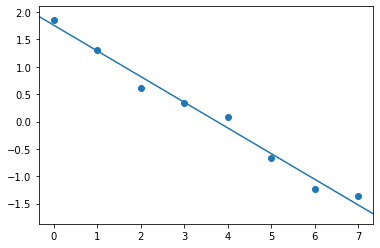

In [59]:
regression_plot(x,y,m,b)

***

In [62]:
# get the final values

# use the item method

m.item()

-0.4692836403846741

In [61]:
b.item()

1.759989857673645

***

In [63]:
# note the initial values

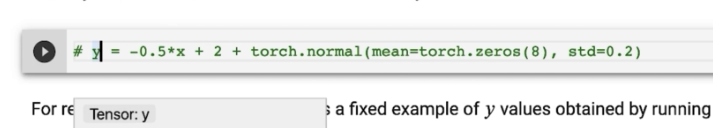

**N.B.**: The model doesn't perfectly approximate the slope (-0.5) and $y$-intercept (2.0) used to simulate the outcomes $y$ at the top of this notebook. This reflects the imperfectness of the sample of eight data points due to adding random noise during the simulation step. In the real world, the best solution would be to sample additional data points: The more data we sample, the more accurate our estimates of the true underlying parameters will be. 

In [64]:
# the reason could be that teh sample size is too small

***

# Exercises

***

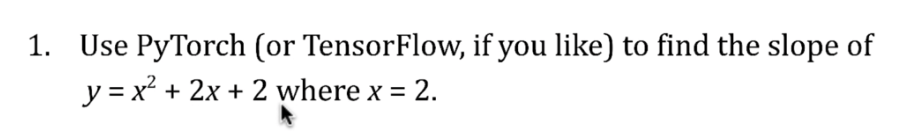

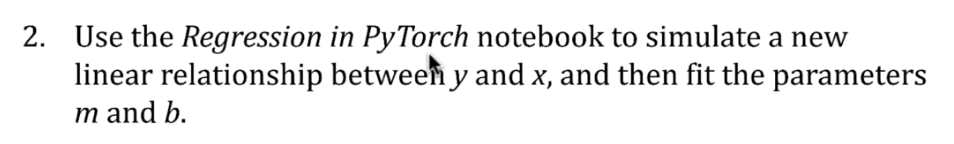

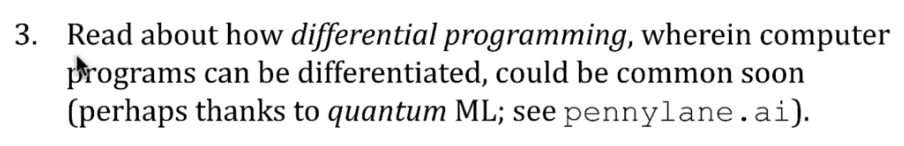

***

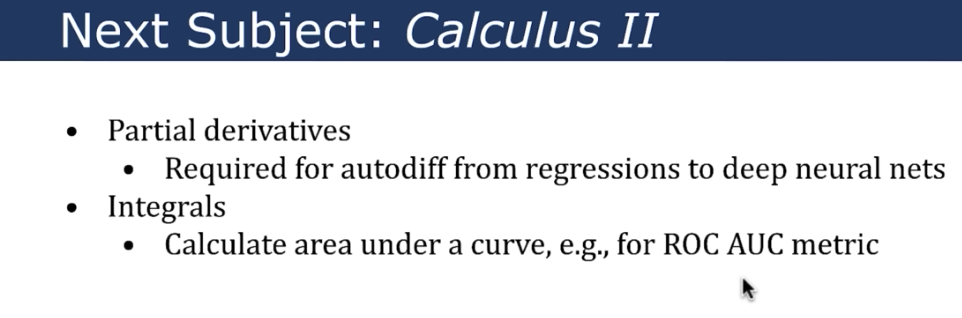

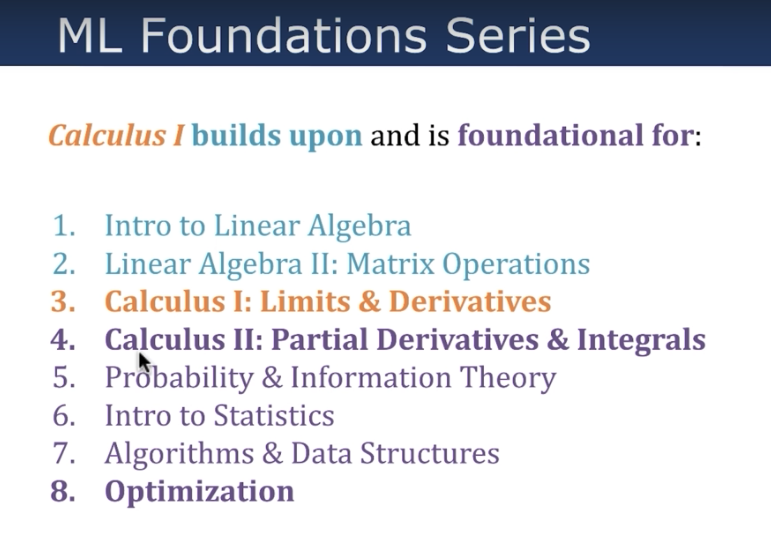

***

In [65]:
# differential programming

# could be the future of programming

In [66]:
# Quantum ML

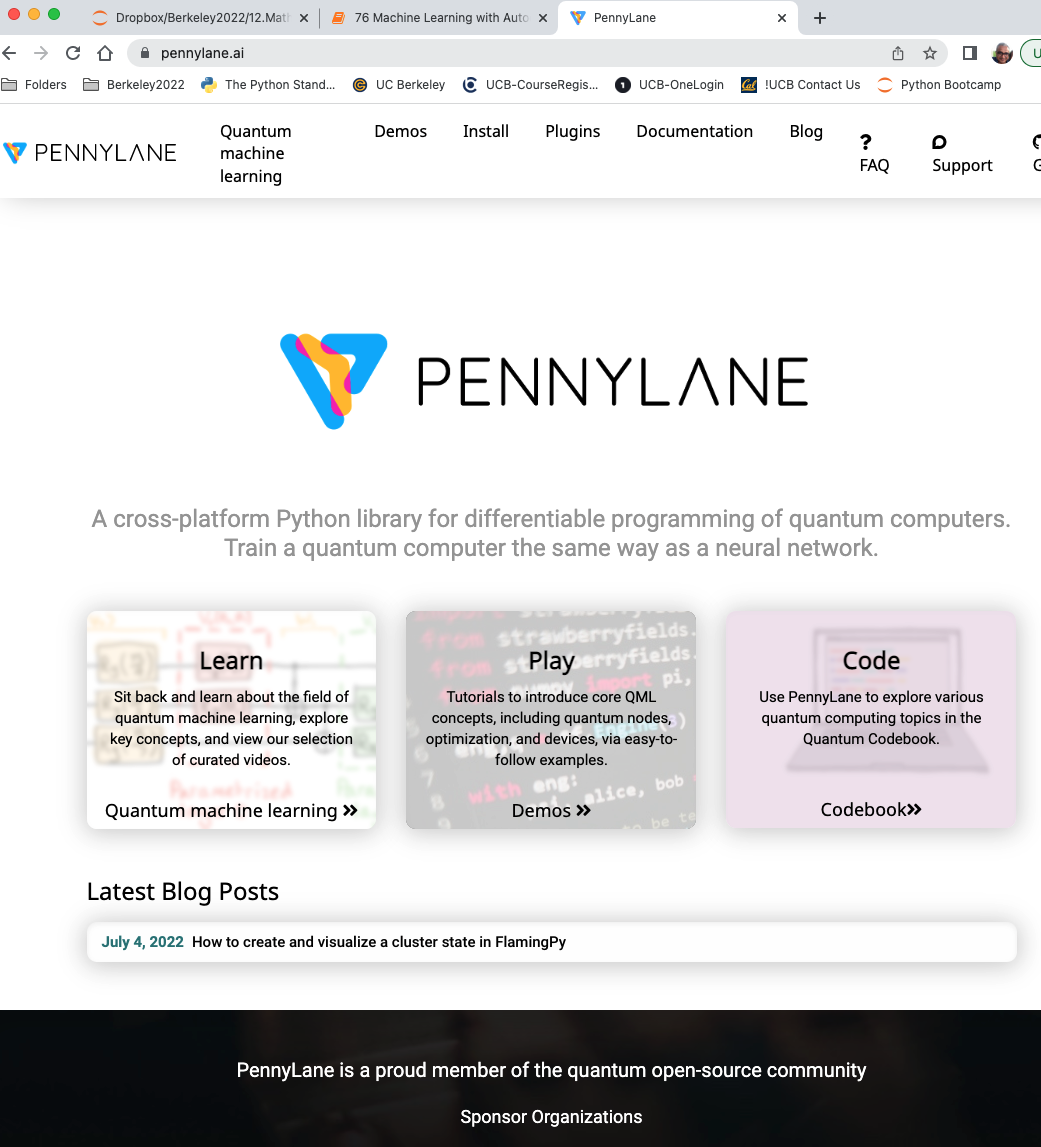